<a href="https://colab.research.google.com/github/night2wolf/CS490-ML-Lab2/blob/master/Question7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.3671 - accuracy: 0.7460 - val_loss: 0.2710 - val_accuracy: 0.7946
Epoch 2/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.2635 - accuracy: 0.7972 - val_loss: 0.2528 - val_accuracy: 0.7969
Epoch 3/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2426 - accuracy: 0.7972 - val_loss: 0.2307 - val_accuracy: 0.7960
Epoch 4/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2223 - accuracy: 0.7973 - val_loss: 0.2117 - val_accuracy: 0.7973
Epoch 5/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2059 - accuracy: 0.7986 - val_loss: 0.1980 - val_accuracy: 0.7991
Epoch 6/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1942 - accuracy: 0.8000 - val_loss: 0.1882 - val_accuracy: 0.8003
Epoch 7/50
60000/60000 [==============================] - 1s 17us/st

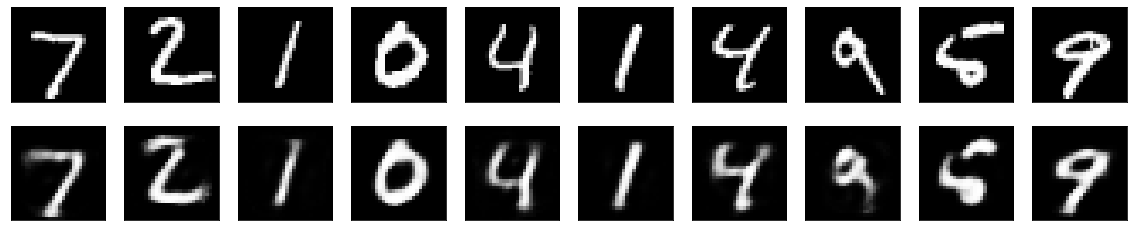

In [32]:
# importing the required modules
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt

# Encode size.
enc_size = 32 

# Input placeholder.
input_image = Input(shape=(784,))

# Encoding the input.
encoded = Dense(enc_size, activation='relu')(input_image)

# Decoding the encoded input.
decoded = Dense(784, activation='sigmoid')(encoded)

# Creating model for auto encoders.
autoencoder = Model(input_image, decoded)

# Creating model for encoder.
encoder = Model(input_image, encoded)

# Encoder input placeholder.
encoded_input = Input(shape=(enc_size,))

# Gets last layer of autoencoder.
decoder_layer = autoencoder.layers[-1]

# Creating model for decoder.
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compiling the autoencoders.
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# Dividing the data.
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


# Passing data into model.
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


# Encoding the test data.
encoded_imgs = encoder.predict(x_test)

# Decoding the encoded test data.
decoded_imgs = decoder.predict(encoded_imgs)

# Code to display first 10 figures of test data from the prediction.
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  # Converting the images to gray scale.
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()




